### LOAD DATASET

In [2]:
import pandas as pd

file_path = 'data/ai4i2020.csv'
df = pd.read_csv(file_path)

df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
le_type = LabelEncoder()
df['Type'] = le_type.fit_transform(df['Type'])

le_product_id = LabelEncoder()
df['Product ID'] = le_product_id.fit_transform(df['Product ID'])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0
1,2,1003,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0
2,3,1004,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0
3,4,1005,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0
4,5,1006,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0


### Exploratory Data Analysis (EDA)

visualize the distribution of the target variable Tool wear [min] and the correlation matrix.

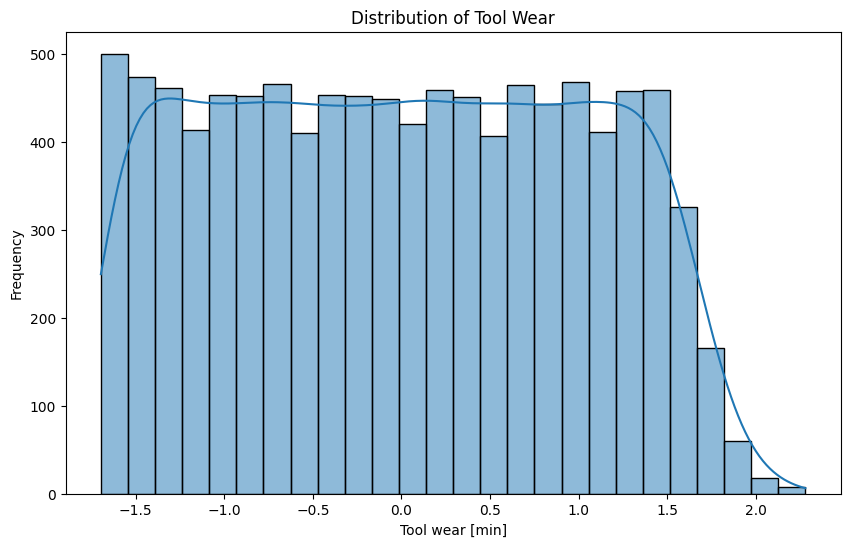

C:\Users\arsen\AppData\Local\Temp\ipykernel_19384\282327526.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Tool wear [min]'], shade=True)


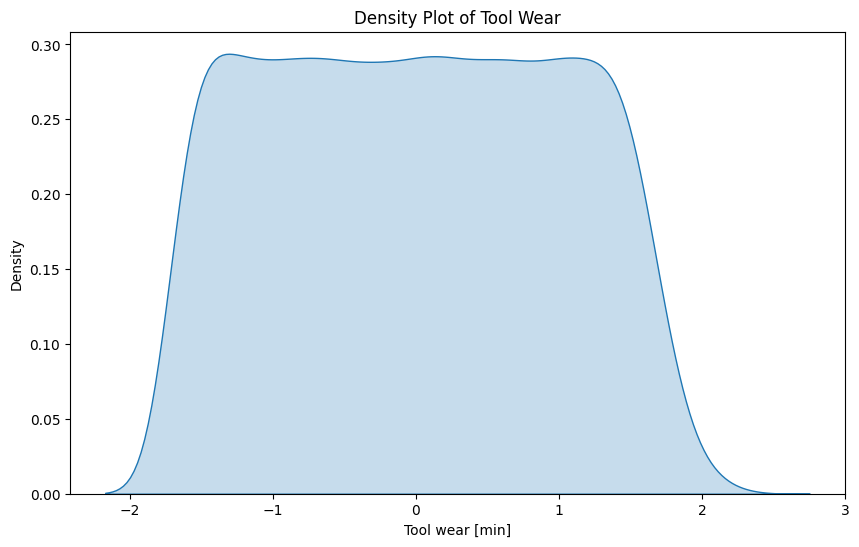

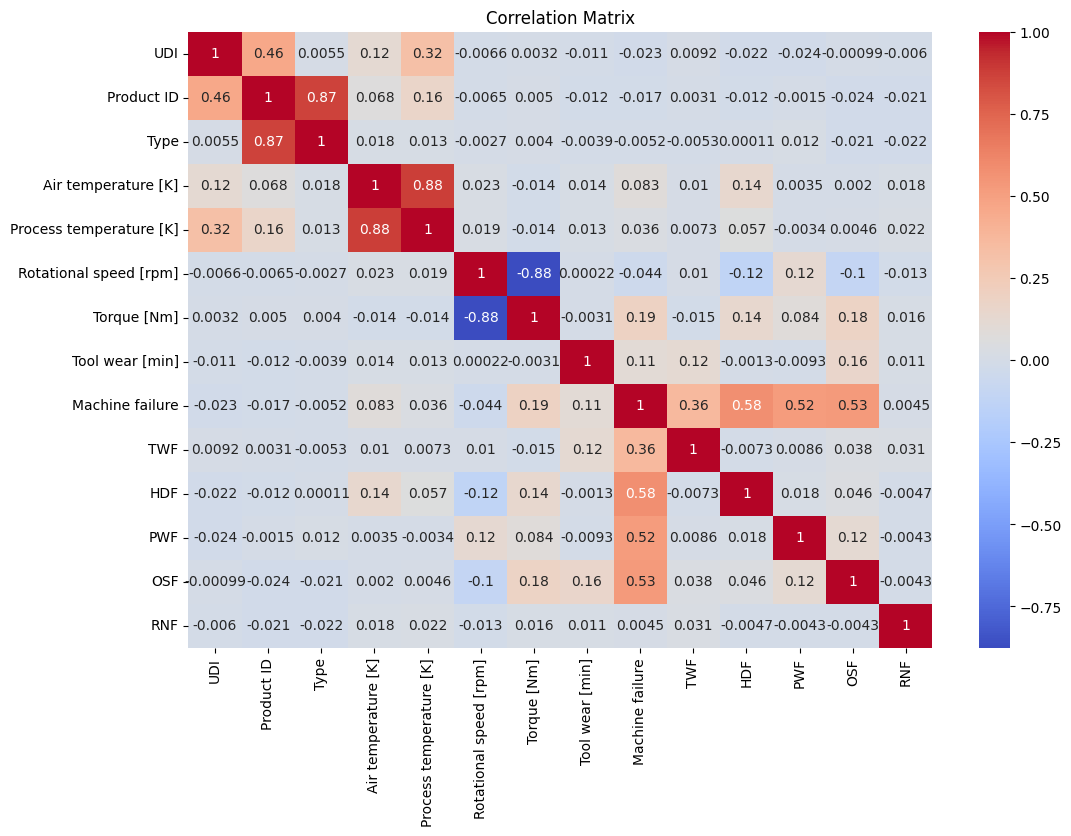

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Tool wear [min]
plt.figure(figsize=(10, 6))
sns.histplot(df['Tool wear [min]'], kde=True)
plt.title('Distribution of Tool Wear')
plt.xlabel('Tool wear [min]')
plt.ylabel('Frequency')
plt.show()

# Density plot for Tool wear [min]
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Tool wear [min]'], shade=True)
plt.title('Density Plot of Tool Wear')
plt.xlabel('Tool wear [min]')
plt.ylabel('Density')
plt.show()

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Since Tool wear [min] is continuous, we can either treat this as a regression problem or convert it into a classification problem

### Model Development 
Approach 1: Linear Regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training testing
X = df.drop(['Tool wear [min]'], axis=1)
y = df['Tool wear [min]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.0085009340756856
R-squared: 0.030203496602738134


The R-squared value of 0.0302 indicates that the model explains only about 3% of the variance in the Tool wear [min] target variable, which suggests that the model is not performing well in predicting tool wear based on the provided features.

Approach 2 : Classification model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Binning the target variable
df['Tool wear category'] = pd.cut(df['Tool wear [min]'], bins=[-1, 1, 4, float('inf')], labels=[0, 1, 2])

# cleaning NaN values
df = df.dropna(subset=['Tool wear category'])

# split (training and testign)
X = df.drop(['Tool wear [min]', 'Tool wear category'], axis=1)
y = df['Tool wear category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model for classification
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate 
classification_report_result = classification_report(y_test, y_pred, output_dict=True)
confusion_matrix_result = confusion_matrix(y_test, y_pred)


c:\Users\arsen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#print result
import pprint
pp = pprint.PrettyPrinter(indent=4)
print("Classification Report:")
pp.pprint(classification_report_result)

print("\nConfusion Matrix:")
print(confusion_matrix_result)

Classification Report:
{   '0': {   'f1-score': 0.857841937851725,
             'precision': 0.7513930561508787,
             'recall': 0.999429874572406,
             'support': 1754.0},
    '1': {   'f1-score': 0.093603744149766,
             'precision': 0.967741935483871,
             'recall': 0.04918032786885246,
             'support': 610.0},
    'accuracy': 0.7542301184433164,
    'macro avg': {   'f1-score': 0.4757228410007455,
                     'precision': 0.8595674958173749,
                     'recall': 0.5243051012206292,
                     'support': 2364.0},
    'weighted avg': {   'f1-score': 0.6606400350775309,
                        'precision': 0.8072191206149757,
                        'recall': 0.7542301184433164,
                        'support': 2364.0}}

Confusion Matrix:
[[1753    1]
 [ 580   30]]


## INSIGHT
- The model achieves a high recall for class 0 (low tool wear) but fails to predict any instances of class 1 (medium tool wear).
- This imbalance indicates that the model is not performing well for the minority class (1), likely due to class imbalance in the dataset.

### Handling Class Imbalance with SMOTE and Training a Random Forest Classifier

In [8]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to balance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

#Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_res, y_res)

y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_classification_report = classification_report(y_test, y_pred_rf)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)





In [10]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
print("Classification Report:")
pp.pprint(rf_classification_report)

print("\nConfusion Matrix:")
print(rf_confusion_matrix)

Classification Report:
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.85      0.88      0.86      1754\n'
 '           1       0.61      0.56      0.58       610\n'
 '\n'
 '    accuracy                           0.79      2364\n'
 '   macro avg       0.73      0.72      0.72      2364\n'
 'weighted avg       0.79      0.79      0.79      2364\n')

Confusion Matrix:
[[1535  219]
 [ 270  340]]


The results show that applying SMOTE and training a Random Forest classifier has indeed improved the performance.
- The Random Forest classifier, combined with SMOTE, shows improved precision, recall, and F1-scores, especially for the minority class.
- The confusion matrix gives a clearer view of the model's performance in correctly predicting each class.